# Kaggle Competition: Predict house sale prices

Link to Kaggle competition: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


Goal:
- It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric:
- Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.
- Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

Submission File Format:
- The file should contain a header and have the following format:
```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

# Imports

## Packages

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from scipy.stats import skew, zscore

In [6]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Data

In [7]:
data = pd.read_csv('../data/train.csv', index_col='Id')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [8]:
def show_documentation():
    with open('../data/data_description.txt', 'r') as documentation:
        print(documentation.read())
        
show_documentation()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Inspect

## General

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Duplicates

In [10]:
data.duplicated().sum()

0

## Missing data

### Overview

In [11]:
# First view
na_overview = data.isna().sum().sort_values(ascending=False)

na_overview.head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

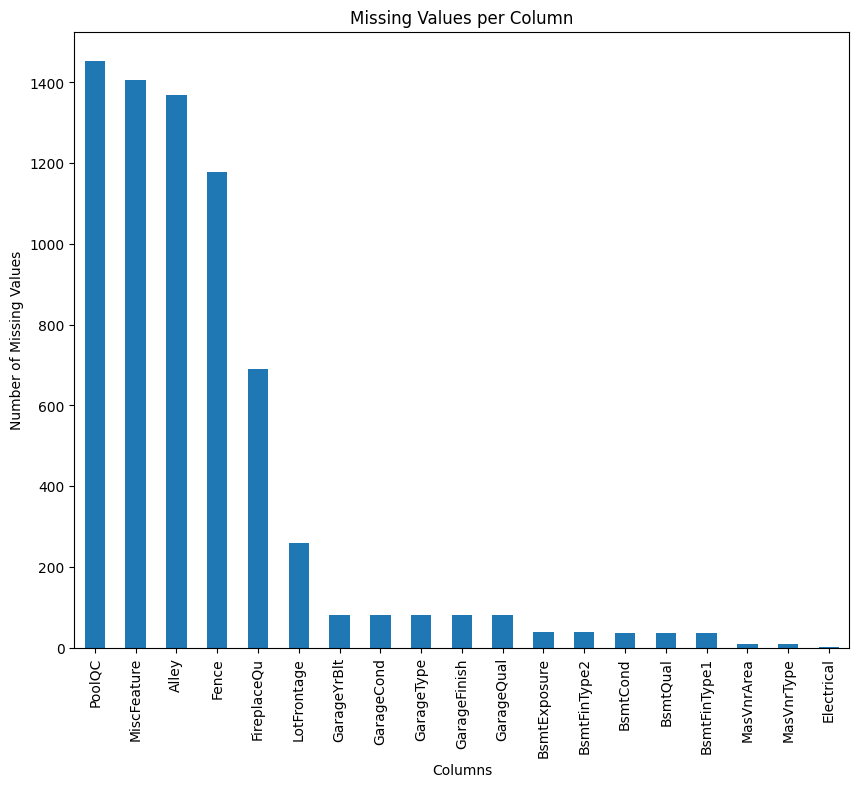

In [12]:
# Filter out columns with no missing values
missing_values = na_overview[na_overview > 0]

# Plot
plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.xticks(rotation=90)
plt.show()


In [13]:
len(missing_values)

19

### Instanciate lists to track strategies

In [14]:
na_strategy_fill = set()
na_strategy_impute = set()

### PoolQC

In [15]:
data['PoolQC'].value_counts(dropna=False, ascending=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

__Documentation__

PoolQC: Pool quality
```
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
NA	No Pool
```

__Strategy__
- fillna(0)

In [16]:
# Track strategy
na_strategy_fill.add('PoolQC')
na_strategy_fill

{'PoolQC'}

### MiscFeature

In [17]:
data['MiscFeature'].value_counts(dropna=False, ascending=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

__Documentation__

MiscFeature: Miscellaneous feature not covered in other categories
```	
Elev	Elevator
Gar2	2nd Garage (if not described in garage section)
Othr	Other
Shed	Shed (over 100 SF)
TenC	Tennis Court
NA	None
```

__Strategy__
- fillna(0)

In [18]:
# Track strategy
na_strategy_fill.add('MiscFeature')
na_strategy_fill

{'MiscFeature', 'PoolQC'}

### Alley

In [19]:
data['Alley'].value_counts(dropna=False, ascending=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

__Documentation__

Alley: Type of alley access to property
    
```
Grvl	Gravel
Pave	Paved
NA 	No alley access
```

__Strategy__
- fillna(0)

In [20]:
# Track strategy
na_strategy_fill.add('Alley')
na_strategy_fill

{'Alley', 'MiscFeature', 'PoolQC'}

### Fence

In [21]:
data['Fence'].value_counts(dropna=False, ascending=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

__Documentation__

Fence: Fence quality
    
```
GdPrv	Good Privacy
MnPrv	Minimum Privacy
GdWo	Good Wood
MnWw	Minimum Wood/Wire
NA	No Fence
```

__Strategy__
- fillna(0)

In [22]:
# Track strategy
na_strategy_fill.add('Fence')
na_strategy_fill

{'Alley', 'Fence', 'MiscFeature', 'PoolQC'}

### FireplaceQu

In [23]:
data['FireplaceQu'].value_counts(dropna=False, ascending=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

__Documentation__

FireplaceQu: Fireplace quality
    
```
Ex	Excellent - Exceptional Masonry Fireplace
Gd	Good - Masonry Fireplace in main level
TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
Fa	Fair - Prefabricated Fireplace in basement
Po	Poor - Ben Franklin Stove
NA	No Fireplace
```

__Strategy__
- fillna(0)

In [24]:
# Track strategy
na_strategy_fill.add('FireplaceQu')
na_strategy_fill

{'Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'}

### LotFrontage 

In [25]:
data['LotFrontage'].value_counts(dropna=False, ascending=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64

__Documentation__

LotFrontage: Linear feet of street connected to property

In [26]:
# Check if there're any houses with 0 feet of street connected to property
(data['LotFrontage'] == 0).sum()

# Assumption: NA's might be 0 values

0

In [27]:
# Check if the Street column (type of road access to property) provides more insights on how to deal with missing values
data['Street'].value_counts(dropna=False, ascending=False)

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [28]:
# Check if the PavedDrive column (paved driveway) provides more insights on how to deal with missing values
data['PavedDrive'].value_counts(dropna=False, ascending=False)

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

__Findings__
- According to Street and PavedDrive columns it seems like there're no properties not connected to a street
- Assumption: NA's are true NA's and not 0 values


__Strategy__
- Impute

In [29]:
# Track strategy
na_strategy_impute.add('LotFrontage')
na_strategy_impute

{'LotFrontage'}

### GarageYrBlt

In [30]:
data['GarageYrBlt'].value_counts(dropna=False, ascending=False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

__Documentation__

GarageYrBlt: Year garage was built

__Strategy__
- Impute

In [31]:
# Track strategy
na_strategy_impute.add('GarageYrBlt')
na_strategy_impute

{'GarageYrBlt', 'LotFrontage'}

### GarageCond

In [32]:
data['GarageCond'].value_counts(dropna=False, ascending=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

__Documentation__

GarageCond: Garage condition
    
```
Ex	Excellent
Gd	Good
TA	Typical/Average
Fa	Fair
Po	Poor
NA	No Garage
```

__Strategy__
- fillna(0)

In [33]:
# Track strategy
na_strategy_fill.add('GarageCond')
na_strategy_fill

{'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'MiscFeature', 'PoolQC'}

### GarageType

In [34]:
data['GarageType'].value_counts(dropna=False, ascending=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

__Documentation__

GarageType: Garage location
    
```
2Types	More than one type of garage
Attchd	Attached to home
Basment	Basement Garage
BuiltIn	Built-In (Garage part of house - typically has room above garage)
CarPort	Car Port
Detchd	Detached from home
NA	No Garage
```

__Strategy__
- fillna(0)

In [35]:
# Track strategy
na_strategy_fill.add('GarageType')
na_strategy_fill

{'Alley',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageType',
 'MiscFeature',
 'PoolQC'}

### GarageFinish

In [36]:
data['GarageFinish'].value_counts(dropna=False, ascending=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

__Documentation__

GarageFinish: Interior finish of the garage
    
```
Fin	Finished
RFn	Rough Finished	
Unf	Unfinished
NA	No Garage
```

__Strategy__
- fillna(0)

In [37]:
# Track strategy
na_strategy_fill.add('GarageFinish')
na_strategy_fill

{'Alley',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageType',
 'MiscFeature',
 'PoolQC'}

### GarageQual

In [38]:
data['GarageQual'].value_counts(dropna=False, ascending=False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

__Documentation__

GarageQual: Garage quality
    
```
Ex	Excellent
Gd	Good
TA	Typical/Average
Fa	Fair
Po	Poor
NA	No Garage
```

__Strategy__
- fillna(0)

In [39]:
# Track strategy
na_strategy_fill.add('GarageQual')
na_strategy_fill

{'Alley',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MiscFeature',
 'PoolQC'}

### BsmtExposure  

In [40]:
data['BsmtExposure'].value_counts(dropna=False, ascending=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

__Documentation__

BsmtExposure: Refers to walkout or garden level walls
```
Gd	Good Exposure
Av	Average Exposure (split levels or foyers typically score average or above)	
Mn	Mimimum Exposure
No	No Exposure
NA	No Basement
```

__Strategy__
- fillna(0)

In [41]:
# Track strategy
na_strategy_fill.add('BsmtExposure')
na_strategy_fill

{'Alley',
 'BsmtExposure',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MiscFeature',
 'PoolQC'}

### BsmtFinType2 

In [42]:
data['BsmtFinType2'].value_counts(dropna=False, ascending=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

__Documentation__

BsmtFinType2: Rating of basement finished area (if multiple types)

```
GLQ	Good Living Quarters
ALQ	Average Living Quarters
BLQ	Below Average Living Quarters	
Rec	Average Rec Room
LwQ	Low Quality
Unf	Unfinshed
NA	No Basement
```

__Strategy__
- fillna(0)

In [43]:
# Track strategy
na_strategy_fill.add('BsmtFinType2')
na_strategy_fill

{'Alley',
 'BsmtExposure',
 'BsmtFinType2',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MiscFeature',
 'PoolQC'}

### BsmtCond 

In [44]:
data['BsmtCond'].value_counts(dropna=False, ascending=False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

__Documentation__

BsmtCond: Evaluates the general condition of the basement
    
```
Ex	Excellent
Gd	Good
TA	Typical - slight dampness allowed
Fa	Fair - dampness or some cracking or settling
Po	Poor - Severe cracking, settling, or wetness
NA	No Basement
```

__Strategy__
- fillna(0)

In [45]:
# Track strategy
na_strategy_fill.add('BsmtCond')
na_strategy_fill

{'Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MiscFeature',
 'PoolQC'}

### BsmtQual

In [46]:
data['BsmtQual'].value_counts(dropna=False, ascending=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

__Documentation__

BsmtQual: Evaluates the height of the basement
```
Ex	Excellent (100+ inches)	
Gd	Good (90-99 inches)
TA	Typical (80-89 inches)
Fa	Fair (70-79 inches)
Po	Poor (<70 inches
NA	No Basement
```

__Strategy__
- fillna(0)

In [47]:
# Track strategy
na_strategy_fill.add('BsmtQual')
na_strategy_fill

{'Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MiscFeature',
 'PoolQC'}

### BsmtFinType1

In [48]:
data['BsmtFinType1'].value_counts(dropna=False, ascending=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

__Documentation__

BsmtFinType1: Rating of basement finished area

```
GLQ	Good Living Quarters
ALQ	Average Living Quarters
BLQ	Below Average Living Quarters	
Rec	Average Rec Room
LwQ	Low Quality
Unf	Unfinshed
NA	No Basement
```

__Strategy__
- fillna(0)

In [49]:
# Track strategy
na_strategy_fill.add('BsmtFinType1')
na_strategy_fill

{'Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MiscFeature',
 'PoolQC'}

### MasVnrArea

In [50]:
data['MasVnrArea'].value_counts(dropna=False, ascending=False)

0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 328, dtype: int64

__Findings__
- There're 0 values in the column, so most likely NA's are true NA's

__Strategy__
- Impute

In [51]:
# Track strategy
na_strategy_impute.add('MasVnrArea')
na_strategy_impute

{'GarageYrBlt', 'LotFrontage', 'MasVnrArea'}

### MasVnrType

In [52]:
data['MasVnrType'].value_counts(dropna=False, ascending=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

__Documentation__

MasVnrType: Masonry veneer type
```
BrkCmn	Brick Common
BrkFace	Brick Face
CBlock	Cinder Block
None	None
Stone	Stone
```

In [53]:
# Check if NA here are same as in MasVnrArena
data[data['MasVnrType'].isna() & data['MasVnrArea'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


__Strategy__
- impute

In [54]:
# Track strategy
na_strategy_impute.add('MasVnrType')
na_strategy_impute

{'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'MasVnrType'}

### Electrical

In [55]:
data['Electrical'].value_counts(dropna=False, ascending=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

__Documentation__

Electrical: Electrical system
```
SBrkr	Standard Circuit Breakers & Romex
FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
Mix	Mixed
```

__Strategy__
- Impute

In [56]:
# Track strategy
na_strategy_impute.add('Electrical')
na_strategy_impute

{'Electrical', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'MasVnrType'}

### Unit test

In [57]:
# Ensure we've a strategy for every column and there're no typos in the column names
if set(missing_values.index) == na_strategy_fill | na_strategy_impute:
    print("Assertion passed: Sets match.")
else:
    print("Assertion failed: Sets do not match.")

Assertion passed: Sets match.


## Data types

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [59]:
show_documentation()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

__Findings__
- Data types are not always reflecting the actual, inherent data types
    

In [60]:
# Define dictionary with inherent dtypes and tags for preprocessing pipeline based on documentation

dtype_dict = {
    'MSSubClass': ['category', 'nominal'],
    'MSZoning': ['category', 'nominal'],
    'LotFrontage': ['float32','numeric'],
    'LotArea' : ['int32','numeric'],
    'Street' : ['category', 'nominal'],
    'Alley' : ['category', 'nominal'],
    'LotShape' : ['category', 'nominal'],
    'LandContour' : ['category', 'nominal'],
    'Utilities' : ['category', 'ordinal'],
    'LotConfig' : ['category', 'nominal'],
    'LandSlope' : ['category', 'nominal'],
    'Neighborhood' : ['category', 'nominal'],
    'Condition1' : ['category', 'nominal'],
    'Condition2' : ['category', 'nominal'],
    'BldgType' : ['category', 'nominal'],
    'HouseStyle' : ['category', 'nominal'],
    'OverallQual' : ['category', 'ordinal'],
    'OverallCond' : ['category', 'ordinal'],
    'YearBuilt' : ['int32','numeric'],
    'YearRemodAdd' : ['int32','numeric'],
    'RoofStyle' : ['category', 'nominal'],
    'RoofMatl' : ['category', 'nominal'],
    'Exterior1st' : ['category', 'nominal'],
    'Exterior2nd' : ['category', 'nominal'],
    'MasVnrType' : ['category', 'nominal'],
    'MasVnrArea' : ['float32','numeric'],
    'ExterQual' : ['category', 'ordinal'],
    'ExterCond' : ['category', 'ordinal'],
    'Foundation' : ['category', 'nominal'],
    'BsmtQual' : ['category', 'ordinal'],
    'BsmtCond' : ['category', 'ordinal'],
    'BsmtExposure' : ['category', 'ordinal'],
    'BsmtFinType1' : ['category', 'ordinal'],
    'BsmtFinSF1' : ['int32','numeric'],
    'BsmtFinType2' : ['category', 'ordinal'],
    'BsmtFinSF2' : ['int32','numeric'],
    'BsmtUnfSF' : ['int32','numeric'],
    'TotalBsmtSF' : ['int32','numeric'],
    'Heating' : ['category', 'nominal'],
    'HeatingQC' : ['category', 'ordinal'],
    'CentralAir' : ['category','ordinal'],
    'Electrical' : ['category', 'nominal'],
    '1stFlrSF' : ['int32','numeric'],
    '1stFlrSF' : ['int32','numeric'],
    '2ndFlrSF' : ['int32','numeric'],
    'LowQualFinSF' : ['int32','numeric'],
    'GrLivArea' : ['int32','numeric'],
    'BsmtFullBath' : ['int32','numeric'],
    'BsmtHalfBath' : ['int32','numeric'],
    'FullBath' : ['int32','numeric'],
    'HalfBath' : ['int32','numeric'],
    'BedroomAbvGr' : ['int32','numeric'],
    'KitchenAbvGr' : ['int32','numeric'],
    'KitchenQual' : ['category', 'ordinal'],
    'TotRmsAbvGrd' : ['int32','numeric'],
    'Functional' : ['category', 'ordinal'],
    'Fireplaces' : ['int32','numeric'],
    'FireplaceQu' : ['category', 'ordinal'],
    'GarageType' : ['category', 'nominal'],
    'GarageYrBlt' : ['int32','numeric'],
    'GarageFinish' : ['category', 'ordinal'],
    'GarageCars' : ['int32','numeric'],
    'GarageArea' : ['int32','numeric'],
    'GarageQual' : ['category', 'ordinal'],
    'GarageCond' : ['category', 'ordinal'],
    'PavedDrive' : ['category', 'nominal'],
    'WoodDeckSF' : ['int32','numeric'],
    'OpenPorchSF' : ['int32','numeric'],
    'EnclosedPorch' : ['int32','numeric'],
    '3SsnPorch' : ['int32','numeric'],
    'ScreenPorch' : ['int32','numeric'],
    'PoolArea' : ['int32','numeric'],
    'PoolQC' : ['category', 'ordinal'],
    'Fence' : ['category', 'nominal'],
    'MiscFeature' : ['category', 'nominal'],
    'MiscVal' : ['int32','numeric'],
    'MoSold' : ['int32','numeric'],
    'YrSold' : ['int32','numeric'],
    'SaleType' : ['category', 'nominal'],
    'SaleCondition' : ['category', 'nominal'],
    'SalePrice' : ['int32','numeric']
}

In [61]:
len(dtype_dict)

80

In [62]:
overview_table = pd.DataFrame({
    'feature': list(data.columns),
    'dtype_current': [str(data[col].dtype) for col in data.columns],
    'dtype_actual': [dtype_dict[col][0] for col in data.columns],
    'nan_count' : [data[col].isna().sum() for col in data.columns],
    'na_strategy': ['fill_na' if col in na_strategy_fill else 'impute' if col in na_strategy_impute else None for col in data.columns],
    'preprocessing_type': [dtype_dict[col][1] for col in data.columns],
    
})

In [63]:
overview_table.head(50)

,feature,dtype_current,dtype_actual,nan_count,na_strategy,preprocessing_type
0,MSSubClass,int64,category,0,None,nominal
1,MSZoning,object,category,0,None,nominal
2,LotFrontage,float64,float32,259,impute,numeric
3,LotArea,int64,int32,0,None,numeric
4,Street,object,category,0,None,nominal
5,Alley,object,category,1369,fill_na,nominal
6,LotShape,object,category,0,None,nominal
7,LandContour,object,category,0,None,nominal
8,Utilities,object,category,0,None,ordinal
9,LotConfig,object,category,0,None,nominal


### Define order for ordinal variables

#### Setup

In [64]:
ordinal_features = overview_table['feature'][overview_table['preprocessing_type'] == 'ordinal']
ordinal_features

8        Utilities
16     OverallQual
17     OverallCond
26       ExterQual
27       ExterCond
29        BsmtQual
30        BsmtCond
31    BsmtExposure
32    BsmtFinType1
34    BsmtFinType2
39       HeatingQC
40      CentralAir
52     KitchenQual
54      Functional
56     FireplaceQu
59    GarageFinish
62      GarageQual
63      GarageCond
71          PoolQC
Name: feature, dtype: object

In [65]:
dict_ordinal_ordering = {}

In [66]:
show_documentation()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

#### Utilities

In [67]:
dict_ordinal_ordering['Utilities'] = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub',]
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']}

#### OverallQual

In [68]:
dict_ordinal_ordering['OverallQual'] = [1,2,3,4,5,6,7,9,10]
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10]}

#### OverallCond

In [69]:
dict_ordinal_ordering['OverallCond'] = [1,2,3,4,5,6,7,9,10]
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10]}

#### ExterQual

In [70]:
dict_ordinal_ordering['ExterQual'] = ['Po','Fa','TA','Gd','Ex']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex']}

#### ExterCond

In [71]:
dict_ordinal_ordering['ExterCond'] = ['Po','Fa','TA','Gd','Ex']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex']}

#### BsmtQual

In [72]:
dict_ordinal_ordering['BsmtQual'] = ['Po','Fa','TA','Gd','Ex']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex']}

#### BsmtExposure

In [73]:
dict_ordinal_ordering['BsmtExposure'] = ['No','Mn','Av','Gd']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd']}

#### BsmtFinType1

In [74]:
dict_ordinal_ordering['BsmtFinType1'] = ['Unf','LwQ','Rec','BLQ', 'ALQ', 'GLQ']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']}

#### BsmtFinType2

In [75]:
dict_ordinal_ordering['BsmtFinType2'] = ['Unf','LwQ','Rec','BLQ', 'ALQ', 'GLQ']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']}

#### HeatingQC

In [76]:
dict_ordinal_ordering['HeatingQC'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex']}

#### CentralAir

In [77]:
dict_ordinal_ordering['CentralAir'] = ['N', 'Y']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y']}

#### KitchenQual

In [78]:
dict_ordinal_ordering['KitchenQual'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex']}

#### Functional

In [79]:
dict_ordinal_ordering['Functional'] = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']}

#### FireplaceQu

In [80]:
dict_ordinal_ordering['FireplaceQu'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex']}

#### GarageFinish

In [81]:
dict_ordinal_ordering['GarageFinish'] = ['Unf', 'RFn', 'Fin']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageFinish': ['Unf', 'RFn', 'Fin']}

#### GarageQual

In [82]:
dict_ordinal_ordering['GarageQual'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageFinish': ['Unf', 'RFn', 'Fin'],
 'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex']}

#### GarageCond

In [83]:
dict_ordinal_ordering['GarageCond'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageFinish': ['Unf', 'RFn', 'Fin'],
 'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex']}

#### PoolQC

In [84]:
dict_ordinal_ordering['PoolQC'] = ['Fa', 'TA', 'Gd', 'Ex']
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageFinish': ['Unf', 'RFn', 'Fin'],
 'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'PoolQC': ['Fa', 'TA', 'Gd', 'Ex']}

#### Overview

In [85]:
dict_ordinal_ordering

{'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 9, 10],
 'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
 'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'CentralAir': ['N', 'Y'],
 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageFinish': ['Unf', 'RFn', 'Fin'],
 'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'PoolQC': ['Fa', 'TA', 'Gd', 'Ex']}

### Explore scaling for numerical variables

#### Overview

In [86]:
overview_table[overview_table['preprocessing_type'] == 'numeric']

,feature,dtype_current,dtype_actual,nan_count,na_strategy,preprocessing_type
2,LotFrontage,float64,float32,259,impute,numeric
3,LotArea,int64,int32,0,None,numeric
18,YearBuilt,int64,int32,0,None,numeric
19,YearRemodAdd,int64,int32,0,None,numeric
25,MasVnrArea,float64,float32,8,impute,numeric
33,BsmtFinSF1,int64,int32,0,None,numeric
35,BsmtFinSF2,int64,int32,0,None,numeric
36,BsmtUnfSF,int64,int32,0,None,numeric
37,TotalBsmtSF,int64,int32,0,None,numeric
42,1stFlrSF,int64,int32,0,None,numeric


In [87]:
numerical_features = overview_table['feature'][overview_table['preprocessing_type'] == 'numeric']
numerical_features

2       LotFrontage
3           LotArea
18        YearBuilt
19     YearRemodAdd
25       MasVnrArea
33       BsmtFinSF1
35       BsmtFinSF2
36        BsmtUnfSF
37      TotalBsmtSF
42         1stFlrSF
43         2ndFlrSF
44     LowQualFinSF
45        GrLivArea
46     BsmtFullBath
47     BsmtHalfBath
48         FullBath
49         HalfBath
50     BedroomAbvGr
51     KitchenAbvGr
53     TotRmsAbvGrd
55       Fireplaces
58      GarageYrBlt
60       GarageCars
61       GarageArea
65       WoodDeckSF
66      OpenPorchSF
67    EnclosedPorch
68        3SsnPorch
69      ScreenPorch
70         PoolArea
74          MiscVal
75           MoSold
76           YrSold
79        SalePrice
Name: feature, dtype: object

#### Analysis: Skewness + Outliers

In [88]:
# Create a table to store skewness, outlier count (IQR method), and Z-score based outliers
results = pd.DataFrame(columns=["feature", "skewness", "IQR Outliers", "Z-score Outliers"])

# Loop over each numerical feature to calculate the metrics
for feature in numerical_features:
    feature_data = data[feature].dropna()  # Exclude NaNs for calculations
    
    # Calculate skewness
    skewness_value = skew(feature_data)
    
    # Calculate IQR outliers
    Q1 = feature_data.quantile(0.25)
    Q3 = feature_data.quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = ((feature_data < (Q1 - 1.5 * IQR)) | (feature_data > (Q3 + 1.5 * IQR))).sum()
    
    # Calculate Z-score based outliers
    z_scores = zscore(feature_data)
    z_score_outliers = (abs(z_scores) > 3).sum()
    
    # Append results to the DataFrame
    results = results.append({
        "feature": feature,
        "skewness": skewness_value,
        "IQR Outliers": iqr_outliers,
        "Z-score Outliers": z_score_outliers
    }, ignore_index=True)

# Display the results
results


/tmp/ipykernel_1280/648021250.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1280/648021250.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1280/648021250.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1280/648021250.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/ipykernel_1280/648021250.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/tmp/

,feature,skewness,IQR Outliers,Z-score Outliers
0,LotFrontage,2.160866,88,12
1,LotArea,12.195142,69,13
2,YearBuilt,-0.612831,7,6
3,YearRemodAdd,-0.503044,0,0
4,MasVnrArea,2.666326,96,32
5,BsmtFinSF1,1.683771,7,6
6,BsmtFinSF2,4.250888,167,50
7,BsmtUnfSF,0.919323,29,11
8,TotalBsmtSF,1.522688,61,10
9,1stFlrSF,1.375342,20,12


In [89]:
results[results['skewness'] >= 0.8]

,feature,skewness,IQR Outliers,Z-score Outliers
0,LotFrontage,2.160866,88,12
1,LotArea,12.195142,69,13
4,MasVnrArea,2.666326,96,32
5,BsmtFinSF1,1.683771,7,6
6,BsmtFinSF2,4.250888,167,50
7,BsmtUnfSF,0.919323,29,11
8,TotalBsmtSF,1.522688,61,10
9,1stFlrSF,1.375342,20,12
10,2ndFlrSF,0.812194,2,4
11,LowQualFinSF,9.002080,26,20


In [90]:
results[results['skewness'] <= 0.8]

,feature,skewness,IQR Outliers,Z-score Outliers
2,YearBuilt,-0.612831,7,6
3,YearRemodAdd,-0.503044,0,0
13,BsmtFullBath,0.595454,1,16
15,FullBath,0.036524,0,0
16,HalfBath,0.675203,0,12
17,BedroomAbvGr,0.211572,35,14
19,TotRmsAbvGrd,0.675646,30,12
20,Fireplaces,0.648898,5,5
21,GarageYrBlt,-0.648708,0,1
22,GarageCars,-0.342197,5,0


#### Track results

In [91]:
# Tag columns that require log transformation in results table
results['scale_log'] = (results['skewness'] >= 0.8)

In [92]:
results

,feature,skewness,IQR Outliers,Z-score Outliers,scale_log
0,LotFrontage,2.160866,88,12,True
1,LotArea,12.195142,69,13,True
2,YearBuilt,-0.612831,7,6,False
3,YearRemodAdd,-0.503044,0,0,False
4,MasVnrArea,2.666326,96,32,True
5,BsmtFinSF1,1.683771,7,6,True
6,BsmtFinSF2,4.250888,167,50,True
7,BsmtUnfSF,0.919323,29,11,True
8,TotalBsmtSF,1.522688,61,10,True
9,1stFlrSF,1.375342,20,12,True


In [93]:
# Add log scaling tag to all numeric features with skewness >= 0.8

In [94]:
overview_table = overview_table.merge(results[['feature','scale_log']], on='feature', how='left')
overview_table['scale_log'].fillna(False, inplace=True)
overview_table

,feature,dtype_current,dtype_actual,nan_count,na_strategy,preprocessing_type,scale_log
0,MSSubClass,int64,category,0,None,nominal,False
1,MSZoning,object,category,0,None,nominal,False
2,LotFrontage,float64,float32,259,impute,numeric,True
3,LotArea,int64,int32,0,None,numeric,True
4,Street,object,category,0,None,nominal,False
...,...,...,...,...,...,...,...
75,MoSold,int64,int32,0,None,numeric,False
76,YrSold,int64,int32,0,None,numeric,False
77,SaleType,object,category,0,None,nominal,False
78,SaleCondition,object,category,0,None,nominal,False


In [95]:
# Add standard scaling tag to all numeric features

In [96]:
overview_table['scale_std'] = (overview_table['preprocessing_type'] == 'numeric')

### 'MoSold': circular transformation

In [97]:
data['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

#### Transformation

In [98]:
# Transforming the month column to capture circularity
data['MoSold_sin'] = np.sin(2 * np.pi * data['MoSold'] / 12)
data['MoSold_cos'] = np.cos(2 * np.pi * data['MoSold'] / 12)

In [99]:
# Function

def calc_circular(data):
    data['MoSold_sin'] = np.sin(2 * np.pi * data['MoSold'] / 12)
    data['MoSold_cos'] = np.cos(2 * np.pi * data['MoSold'] / 12)
    data.drop(columns=['MoSold'], inplace=True)
    return data

#### Tag

In [100]:
overview_table.loc[overview_table['feature'] == 'MoSold', 'transformation_type'] = "calc_circular"

In [101]:
overview_table[overview_table['feature'] == "MoSold"]

,feature,dtype_current,dtype_actual,nan_count,na_strategy,preprocessing_type,scale_log,scale_std,transformation_type
75,MoSold,int64,int32,0,None,numeric,False,True,calc_circular


### Years

In [102]:
data['GarageYrBlt'].value_counts(dropna=False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [103]:
data['YearBuilt'].value_counts(dropna=False)

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [104]:
data['YearRemodAdd'].value_counts(dropna=False)

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

#### Transformation

In [105]:
# Calculating the age of house, garage and remodeling
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']
data['RemodelAge'] = data['YrSold'] - data['YearRemodAdd']

In [106]:
overview_table.loc[overview_table['feature'].isin(['YrSold','YearBuilt', 'GarageYrBlt', 'YearRemodAdd']), 'transformation_type'] = 'calc_age'

In [107]:
overview_table[overview_table['feature'] == "YrSold"]

,feature,dtype_current,dtype_actual,nan_count,na_strategy,preprocessing_type,scale_log,scale_std,transformation_type
76,YrSold,int64,int32,0,None,numeric,False,True,calc_age


In [108]:
overview_table.head(50)

,feature,dtype_current,dtype_actual,nan_count,na_strategy,preprocessing_type,scale_log,scale_std,transformation_type
0,MSSubClass,int64,category,0,None,nominal,False,False,NaN
1,MSZoning,object,category,0,None,nominal,False,False,NaN
2,LotFrontage,float64,float32,259,impute,numeric,True,True,NaN
3,LotArea,int64,int32,0,None,numeric,True,True,NaN
4,Street,object,category,0,None,nominal,False,False,NaN
5,Alley,object,category,1369,fill_na,nominal,False,False,NaN
6,LotShape,object,category,0,None,nominal,False,False,NaN
7,LandContour,object,category,0,None,nominal,False,False,NaN
8,Utilities,object,category,0,None,ordinal,False,False,NaN
9,LotConfig,object,category,0,None,nominal,False,False,NaN


# Set up preprocessing pipeline

## Overview

### Numerical Features

In [109]:
cyclic_features = overview_table.loc[overview_table['transformation_type'] == 'calc_circular', 'feature'].tolist()
cyclic_features

['MoSold']

In [110]:
age_features = overview_table.loc[overview_table['transformation_type'] == 'calc_age', 'feature'].tolist()
age_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [111]:
log_features = overview_table.loc[overview_table['scale_log'] == True, 'feature'].tolist()
log_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [112]:
num_features_all = overview_table.loc[overview_table['scale_std'] == True, 'feature'].tolist()
num_features_all

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [113]:
num_std_features = list(set(num_features_all) - set(log_features) - set(age_features) - set(cyclic_features))
num_std_features

['FullBath',
 'GarageCars',
 'TotRmsAbvGrd',
 'Fireplaces',
 'BedroomAbvGr',
 'HalfBath',
 'GarageArea',
 'BsmtFullBath']

### Categorical Features

In [114]:
nominal_features = overview_table.loc[overview_table['preprocessing_type'] == 'nominal', 'feature'].tolist()
nominal_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [115]:
ordinal_features = overview_table.loc[overview_table['preprocessing_type'] == 'ordinal', 'feature'].tolist()
ordinal_features

['Utilities',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [201]:
nominal_fillna_features = overview_table[(overview_table['preprocessing_type'] == 'nominal') & (overview_table['na_strategy'] == 'fill_na')]
print(nominal_fillna_features)
nominal_fillna_features = nominal_fillna_features['feature'].tolist()
print(nominal_fillna_features)

        feature dtype_current dtype_actual  nan_count na_strategy  \
5         Alley        object     category       1369     fill_na   
57   GarageType        object     category         81     fill_na   
72        Fence        object     category       1179     fill_na   
73  MiscFeature        object     category       1406     fill_na   

   preprocessing_type  scale_log  scale_std transformation_type  
5             nominal      False      False                 NaN  
57            nominal      False      False                 NaN  
72            nominal      False      False                 NaN  
73            nominal      False      False                 NaN  
['Alley', 'GarageType', 'Fence', 'MiscFeature']


In [202]:
nominal_impute_features = overview_table[(overview_table['preprocessing_type'] == 'nominal') & (overview_table['na_strategy'] == 'impute')]
print(nominal_impute_features)
nominal_impute_features = nominal_impute_features['feature'].tolist()
print(nominal_impute_features)

       feature dtype_current dtype_actual  nan_count na_strategy  \
24  MasVnrType        object     category          8      impute   
41  Electrical        object     category          1      impute   

   preprocessing_type  scale_log  scale_std transformation_type  
24            nominal      False      False                 NaN  
41            nominal      False      False                 NaN  
['MasVnrType', 'Electrical']


In [203]:
nominal_std_features = list(set(nominal_features) - set(nominal_impute_features) - set(nominal_fillna_features))
nominal_std_features

['RoofStyle',
 'Exterior1st',
 'Heating',
 'LandSlope',
 'MSZoning',
 'LotShape',
 'MSSubClass',
 'LandContour',
 'HouseStyle',
 'Foundation',
 'Street',
 'Condition2',
 'Exterior2nd',
 'SaleCondition',
 'SaleType',
 'Condition1',
 'RoofMatl',
 'Neighborhood',
 'LotConfig',
 'BldgType',
 'PavedDrive']

## Preprocessing pipeline

### Numerical

#### Functions

##### Log

In [116]:
## log
def calculate_log(X):
    print(f'ages: {type(X)}')
    print(f'ages: {X}')
    return np.log(X + 1)

In [117]:
log_transf = FunctionTransformer(calculate_log, validate=True, feature_names_out='one-to-one')

##### Ages

In [118]:
def calculate_ages(X):
    year_built = X[:, 0].reshape(-1, 1)         # YearBuilt
    year_remod_add = X[:, 1].reshape(-1, 1)        # YearRemodAdd
    garage_year_built = X[:, 2].reshape(-1, 1) # GarageYrBlt
    year_sold = X[:, 3].reshape(-1, 1)    # YrSold

    # Calculate the ages relative to YrSold
    house_age = year_sold - year_built
    garage_age = year_sold - garage_year_built
    remod_age = year_sold - year_remod_add

    # Concatenate YrSold (unchanged) with the calculated ages
    result = np.hstack([year_sold, house_age, garage_age, remod_age])
    return result

In [119]:
def age_feature_names_out(transformer, input_features):
    return ["YrSold", "HouseAge", "GarageAge", "RemodAge"]

In [120]:
age_transf = FunctionTransformer(calculate_ages, validate=True, feature_names_out=age_feature_names_out)

##### Cyclic

In [121]:
## cyclic
def transform_to_cyclic(X):
    #X = X.to_numpy()  # Ensure X is a NumPy array
    months_sin = np.sin(X / 12 * 2 * np.pi)
    months_cos = np.cos(X / 12 * 2 * np.pi)
    months_sincos = np.column_stack((months_sin, months_cos))
    return months_sincos

In [122]:
def cyclic_feature_names_out(transformer, input_features):
    # Assuming the output columns are something like 'months_sin' and 'months_cos'
    return [f"{input_features[0]}_sin", f"{input_features[0]}_cos"]

In [123]:
cyclic_transf = FunctionTransformer(transform_to_cyclic, validate=True, feature_names_out=cyclic_feature_names_out)

#### Setting up the transformers

In [124]:
num_std_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [125]:
num_log_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transf', log_transf),
    ('scaler', StandardScaler())
    ])

In [126]:
num_cycle_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('cyclic_transf', cyclic_transf),
    ('scaler', StandardScaler())
    ])

In [127]:
num_age_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('age_transf', age_transf),
    ('scaler', StandardScaler())
    ])

#### Setting up the preprocessing pipeline for numerical features

In [128]:
num_preprocessor = ColumnTransformer([
    # Numerical columns
    ('num_std_transformer', num_std_transformer, num_std_features),
    ('num_log_transformer', num_log_transformer, log_features),
    ('num_cycle_transformer', num_cycle_transformer, cyclic_features),
    ('num_age_transformer', num_age_transformer, age_features)
])

In [129]:
num_preprocessor

ColumnTransformer(transformers=[('num_std_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['FullBath', 'GarageCars', 'TotRmsAbvGrd',
                                  'Fireplaces', 'BedroomAbvGr', 'HalfBath',
                                  'GarageArea', 'BsmtFullBath']),
                                ('num_log_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_trans...
                                                 ('scaler', StandardScaler())]),
                                 ['MoSold']),
                                ('num_age_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('age_transf',
                                                  FunctionTransformer(feature_names_out=<function age_feature_names_out at 0x7fc0341ea5f0>,
                                                                      func=<function calculate_ages at 0x7fc0341e9f30>,
                                                                      validate=True)),
                                                 ('scaler', StandardScaler())]),
                                 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
                                  'YrSold'])])

In [130]:
transformed_data = num_preprocessor.fit_transform(data)
transformed_data

ages: <class 'numpy.ndarray'>
ages: [[6.50000e+01 8.45000e+03 1.96000e+02 ... 0.00000e+00 0.00000e+00
  2.08500e+05]
 [8.00000e+01 9.60000e+03 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.81500e+05]
 [6.80000e+01 1.12500e+04 1.62000e+02 ... 0.00000e+00 0.00000e+00
  2.23500e+05]
 ...
 [6.60000e+01 9.04200e+03 0.00000e+00 ... 0.00000e+00 2.50000e+03
  2.66500e+05]
 [6.80000e+01 9.71700e+03 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.42125e+05]
 [7.50000e+01 9.93700e+03 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.47500e+05]]


array([[ 0.78974052,  0.31172464,  0.91220977, ..., -1.04325937,
        -1.00832831, -0.869941  ],
       [ 0.78974052,  0.31172464, -0.31868327, ..., -0.18346506,
         0.07380515,  0.39014067],
       [ 0.78974052,  0.31172464, -0.31868327, ..., -0.97712134,
        -0.92508727, -0.82147632],
       ...,
       [ 0.78974052, -1.02685765,  1.52765629, ...,  1.07315738,
         1.65538482, -0.91840567],
       [-1.02604084, -1.02685765, -0.93412978, ...,  0.77553627,
         1.28080016, -0.43375888],
       [-1.02604084, -1.02685765, -0.31868327, ...,  0.21336307,
         0.57325136,  0.97171682]])

In [129]:
num_preprocessor.get_feature_names_out()

array(['num_std_transformer__BsmtFullBath',
       'num_std_transformer__GarageArea', 'num_std_transformer__FullBath',
       'num_std_transformer__HalfBath', 'num_std_transformer__GarageCars',
       'num_std_transformer__Fireplaces',
       'num_std_transformer__BedroomAbvGr',
       'num_std_transformer__TotRmsAbvGrd',
       'num_log_transformer__LotFrontage', 'num_log_transformer__LotArea',
       'num_log_transformer__MasVnrArea',
       'num_log_transformer__BsmtFinSF1',
       'num_log_transformer__BsmtFinSF2',
       'num_log_transformer__BsmtUnfSF',
       'num_log_transformer__TotalBsmtSF',
       'num_log_transformer__1stFlrSF', 'num_log_transformer__2ndFlrSF',
       'num_log_transformer__LowQualFinSF',
       'num_log_transformer__GrLivArea',
       'num_log_transformer__BsmtHalfBath',
       'num_log_transformer__KitchenAbvGr',
       'num_log_transformer__WoodDeckSF',
       'num_log_transformer__OpenPorchSF',
       'num_log_transformer__EnclosedPorch',
       'num_log

### Categorical

#### Nominal

In [254]:
from sklearn.preprocessing import OneHotEncoder

In [256]:
OHE = OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False)

In [257]:
nominal_fill_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('OHE', OHE)
    ])

In [258]:
nominal_impute_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('OHE', OHE)
    ])

In [259]:
nominal_std_transformer = Pipeline([
    ('OHE', OHE)
    ])

In [260]:
cat_preprocessor = ColumnTransformer([
    # Categorical columns
    ('nominal_fill_transformer', nominal_fill_transformer, nominal_fillna_features),
    ('nominal_impute_transformer', nominal_impute_transformer, nominal_impute_features),
    ('nominal_std_transformer', nominal_std_transformer, nominal_std_features),
])

In [261]:
cat_preprocessor

ColumnTransformer(transformers=[('nominal_fill_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='None',
                                                                strategy='constant')),
                                                 ('OHE',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Alley', 'GarageType', 'Fence',
                                  'MiscFeature']),
                                ('nominal_impute_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strate...
                                 Pipeline(steps=[('OHE',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['RoofStyle', 'Exterior1st', 'Heating',
                                  'LandSlope', 'MSZoning', 'LotShape',
                                  'MSSubClass', 'LandContour', 'HouseStyle',
                                  'Foundation', 'Street', 'Condition2',
                                  'Exterior2nd', 'SaleCondition', 'SaleType',
                                  'Condition1', 'RoofMatl', 'Neighborhood',
                                  'LotConfig', 'BldgType', 'PavedDrive'])])

In [262]:
transformed_data_cat = cat_preprocessor.fit_transform(data)

In [264]:
transformed_data_cat

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [263]:
cat_preprocessor.get_feature_names_out()

array(['nominal_fill_transformer__Alley_Grvl',
       'nominal_fill_transformer__Alley_None',
       'nominal_fill_transformer__Alley_Pave',
       'nominal_fill_transformer__GarageType_2Types',
       'nominal_fill_transformer__GarageType_Attchd',
       'nominal_fill_transformer__GarageType_Basment',
       'nominal_fill_transformer__GarageType_BuiltIn',
       'nominal_fill_transformer__GarageType_CarPort',
       'nominal_fill_transformer__GarageType_Detchd',
       'nominal_fill_transformer__GarageType_None',
       'nominal_fill_transformer__Fence_GdPrv',
       'nominal_fill_transformer__Fence_GdWo',
       'nominal_fill_transformer__Fence_MnPrv',
       'nominal_fill_transformer__Fence_MnWw',
       'nominal_fill_transformer__Fence_None',
       'nominal_fill_transformer__MiscFeature_Gar2',
       'nominal_fill_transformer__MiscFeature_None',
       'nominal_fill_transformer__MiscFeature_Othr',
       'nominal_fill_transformer__MiscFeature_Shed',
       'nominal_fill_transforme

In [274]:
len(cat_preprocessor.get_feature_names_out())

196

#### Ordinal

In [277]:
from sklearn.preprocessing import OrdinalEncoder

In [288]:
dict_ordinal_ordering = {
    'Utilities': [0, 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
    'OverallQual': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'OverallCond': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ExterQual': [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': [0, 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': [0, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': [0, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'CentralAir': [0, 'N', 'Y'],
    'KitchenQual': [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': [0, 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': [0, 'Unf', 'RFn', 'Fin'],
    'GarageQual': [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': [0, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': [0, 'Fa', 'TA', 'Gd', 'Ex']
}


In [289]:
# Specify the order for each feature based on your list of ordinal features
ordinal_features = list(dict_ordinal_ordering.keys())
categories = [dict_ordinal_ordering[feature] for feature in ordinal_features]


In [290]:
OE = OrdinalEncoder(categories=categories)

In [291]:
ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('OE', OE)
    ])

In [292]:
cat_preprocessor = ColumnTransformer([
    # Categorical columns
    ('ordinal_transformer', ordinal_transformer, ordinal_features),
])

In [293]:
transformed_data_cat = cat_preprocessor.fit_transform(data)

In [294]:
transformed_data_cat 

array([[4., 7., 5., ..., 3., 3., 0.],
       [4., 6., 8., ..., 3., 3., 0.],
       [4., 7., 5., ..., 3., 3., 0.],
       ...,
       [4., 7., 9., ..., 3., 3., 0.],
       [4., 5., 6., ..., 3., 3., 0.],
       [4., 5., 6., ..., 3., 3., 0.]])

In [295]:
cat_preprocessor.get_feature_names_out()

array(['ordinal_transformer__Utilities',
       'ordinal_transformer__OverallQual',
       'ordinal_transformer__OverallCond',
       'ordinal_transformer__ExterQual', 'ordinal_transformer__ExterCond',
       'ordinal_transformer__BsmtQual',
       'ordinal_transformer__BsmtExposure',
       'ordinal_transformer__BsmtFinType1',
       'ordinal_transformer__BsmtFinType2',
       'ordinal_transformer__HeatingQC',
       'ordinal_transformer__CentralAir',
       'ordinal_transformer__KitchenQual',
       'ordinal_transformer__Functional',
       'ordinal_transformer__FireplaceQu',
       'ordinal_transformer__GarageFinish',
       'ordinal_transformer__GarageQual',
       'ordinal_transformer__GarageCond', 'ordinal_transformer__PoolQC'],
      dtype=object)